## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasist as ds
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings


%matplotlib inline
sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2)
 
warnings.filterwarnings('ignore')

## Dataset

### Understanding ***Heart Attack Data***
URL : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

About Dataset:
1. Age : Age of the patient.
2. Sex : Sex of the patient (1 = male; 0 = female).
3. exang: exercise induced angina (1 = yes; 0 = no). 
4. ca: number of major vessels (0-3).
5. cp : Chest Pain type chest pain type.
    1. Value 1: typical angina.
    2. Value 2: atypical angina.
    3. Value 3: non-anginal pain.
    4. Value 4: asymptomatic.
6. trtbps : resting blood pressure (in mm Hg).
7. chol : cholestoral in mg/dl fetched via BMI sen.
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
9. rest_ecg : resting electrocardiographic results.
    1. Value 0: normal.
    2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV).
    3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
10. thalach : maximum heart rate achieved.
11. target : 0= less chance of heart attack 1= more chance of heart attack.








### Import dataset

In [2]:
df = pd.read_csv('../dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Preprocessing:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().any().any()

False

In [5]:
df.duplicated().any()

True

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

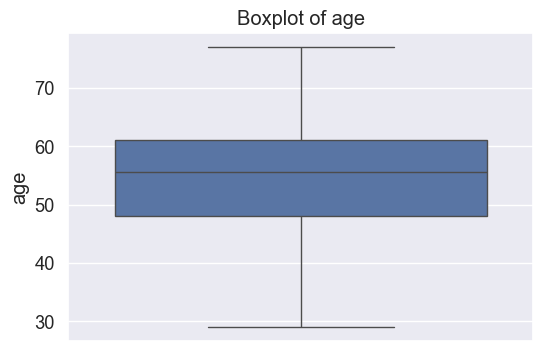

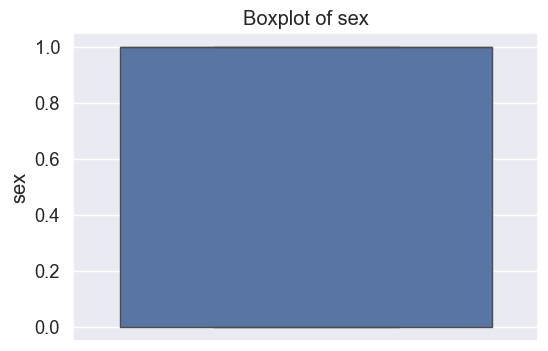

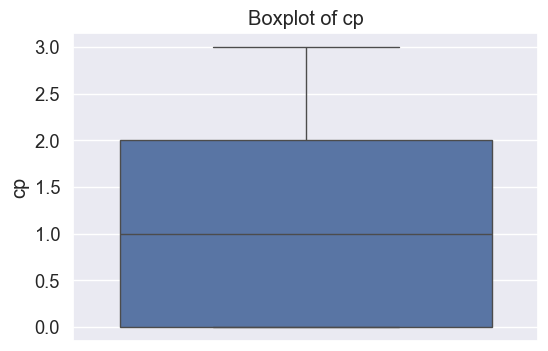

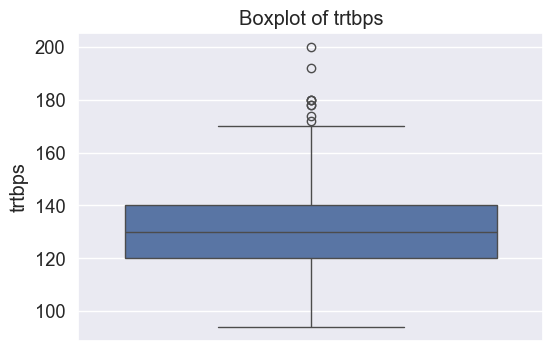

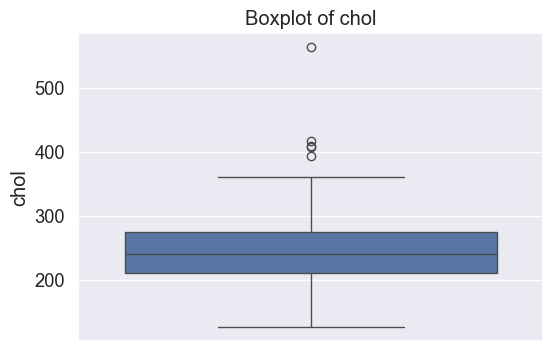

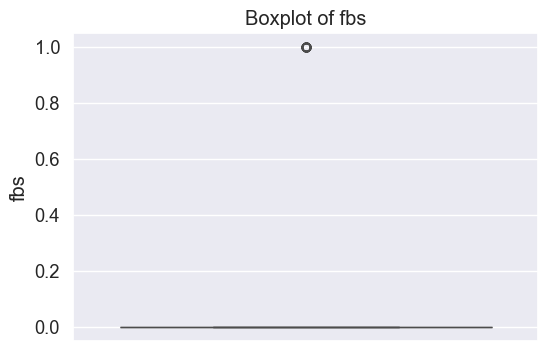

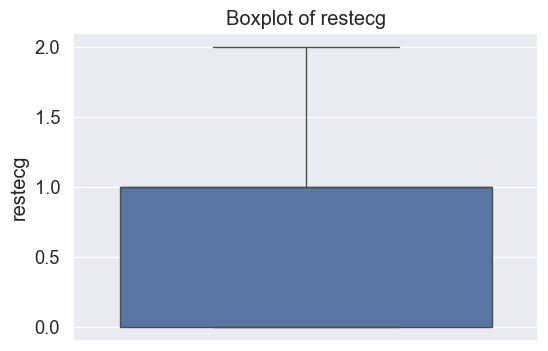

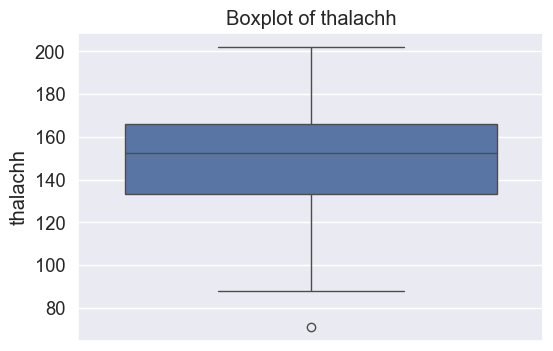

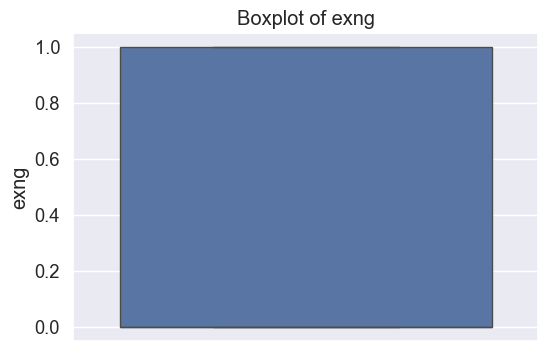

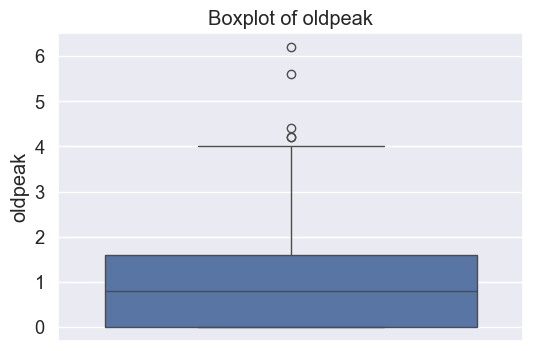

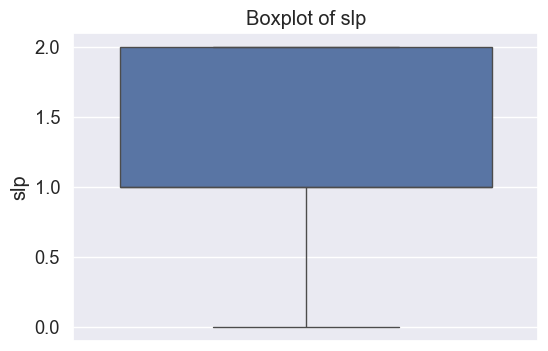

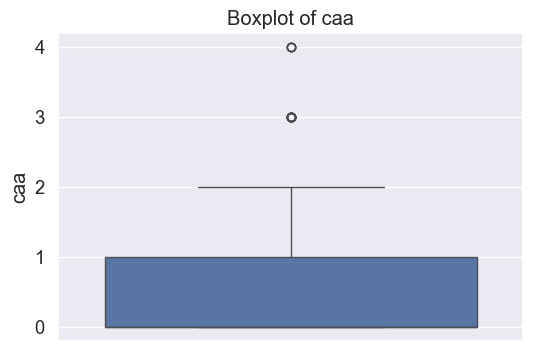

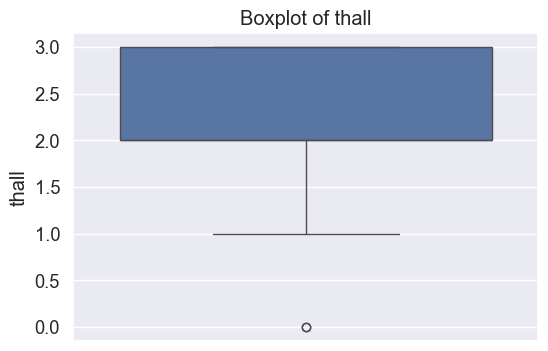

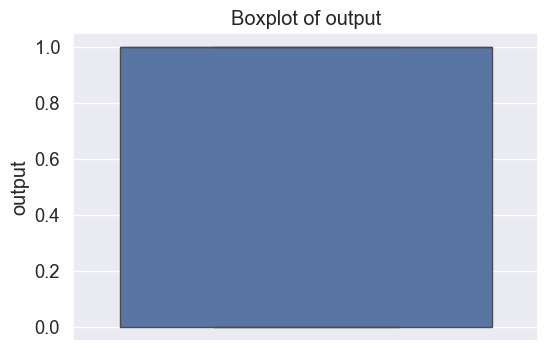

In [10]:
num_df = df.select_dtypes(include=['int64', 'float64']).columns

for column in num_df:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

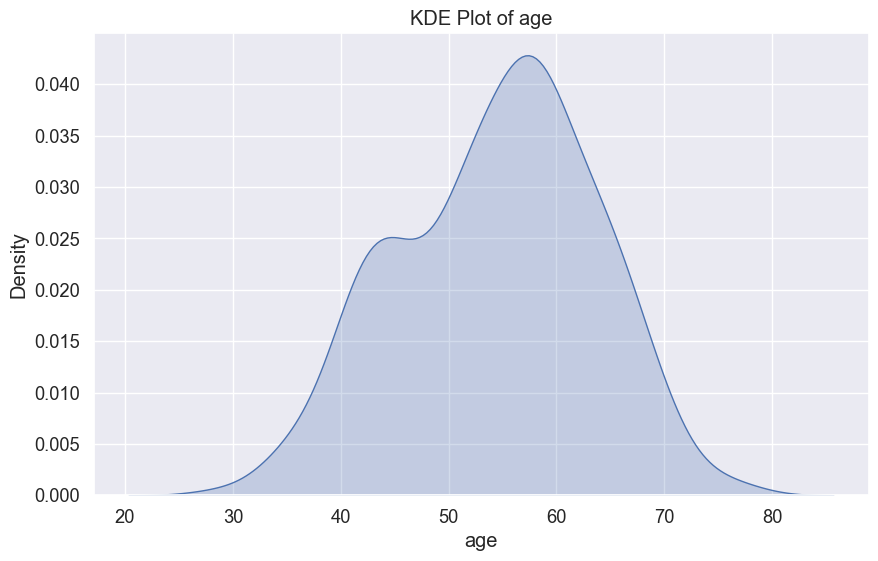

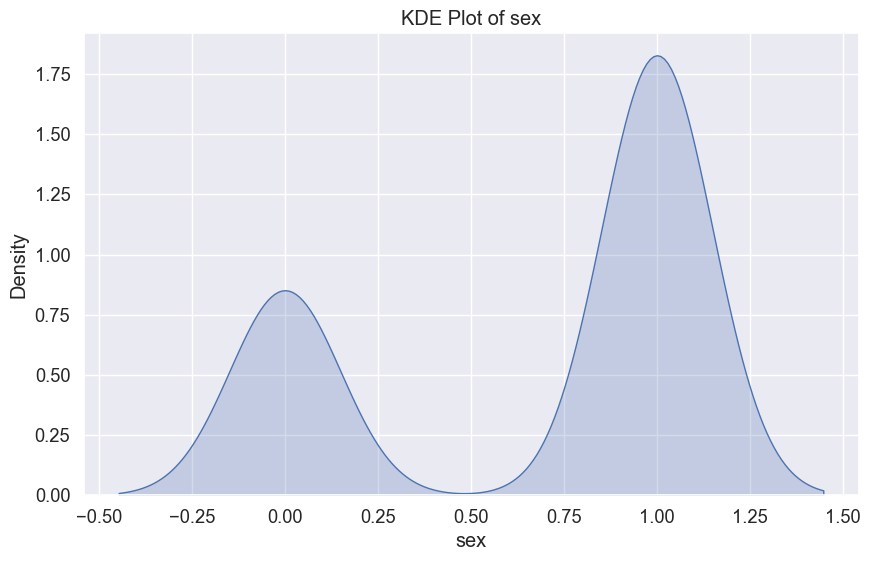

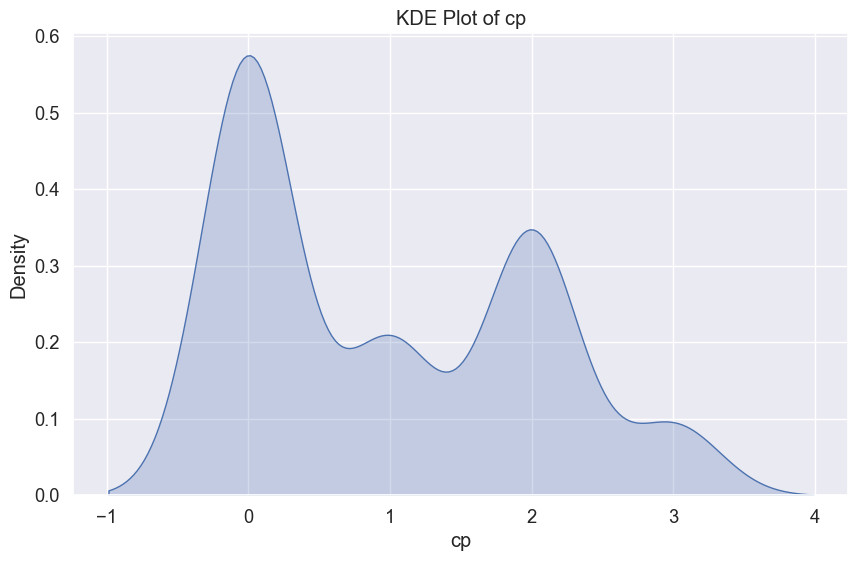

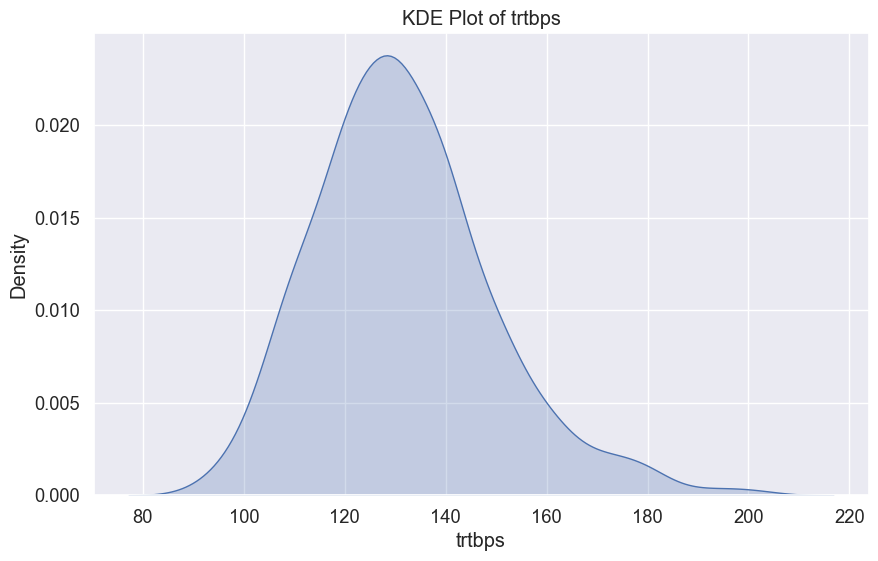

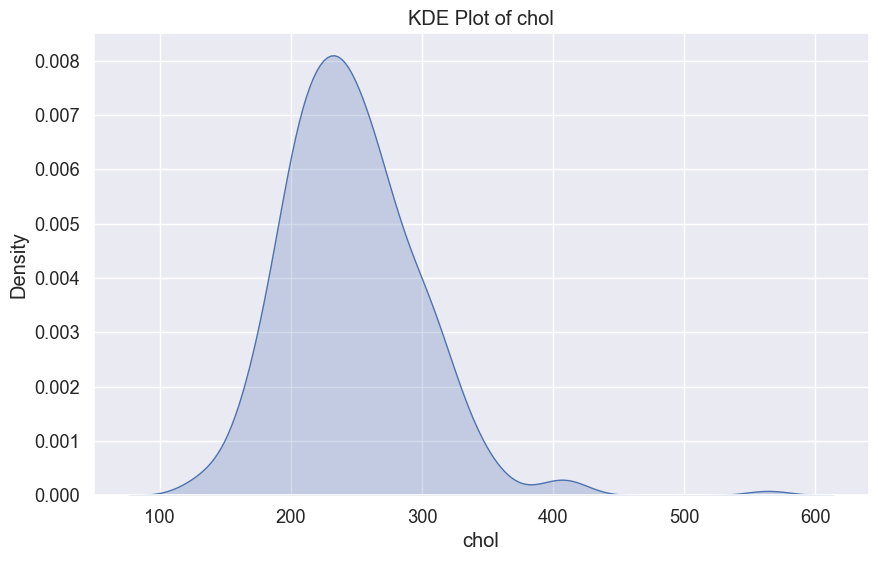

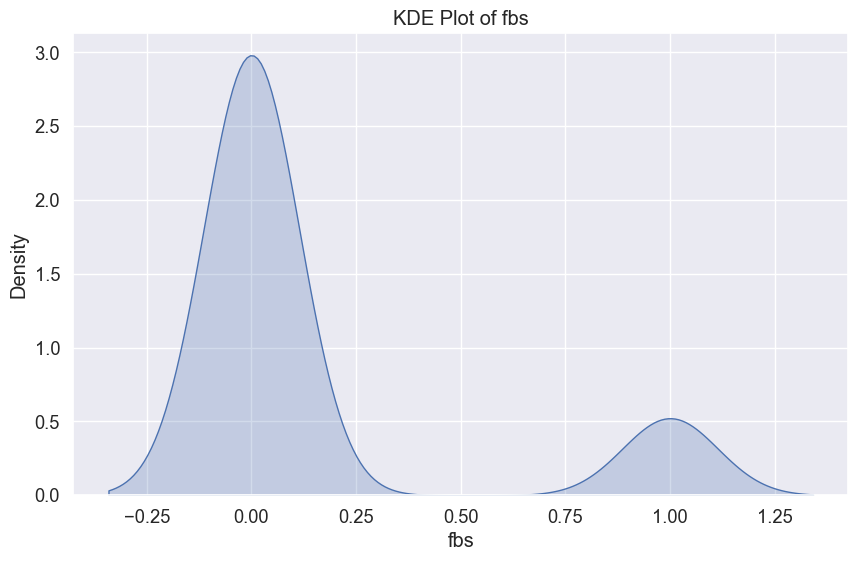

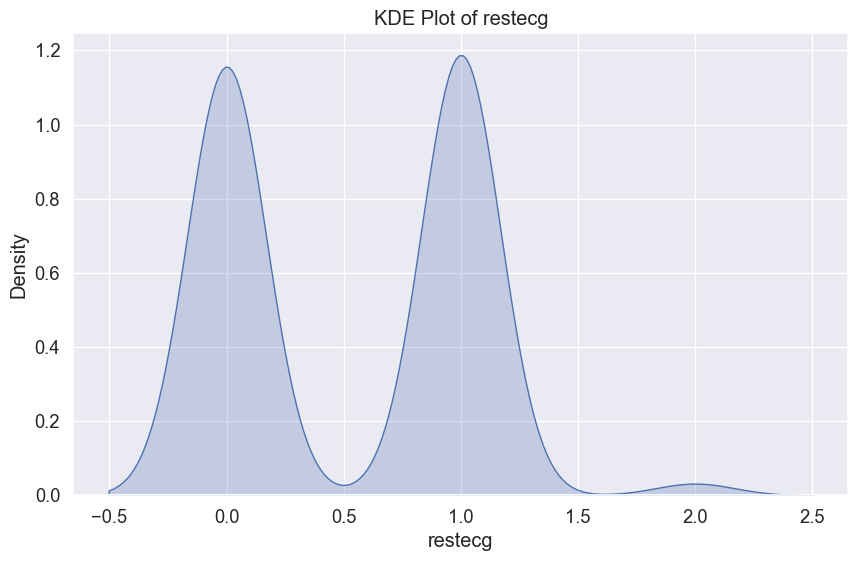

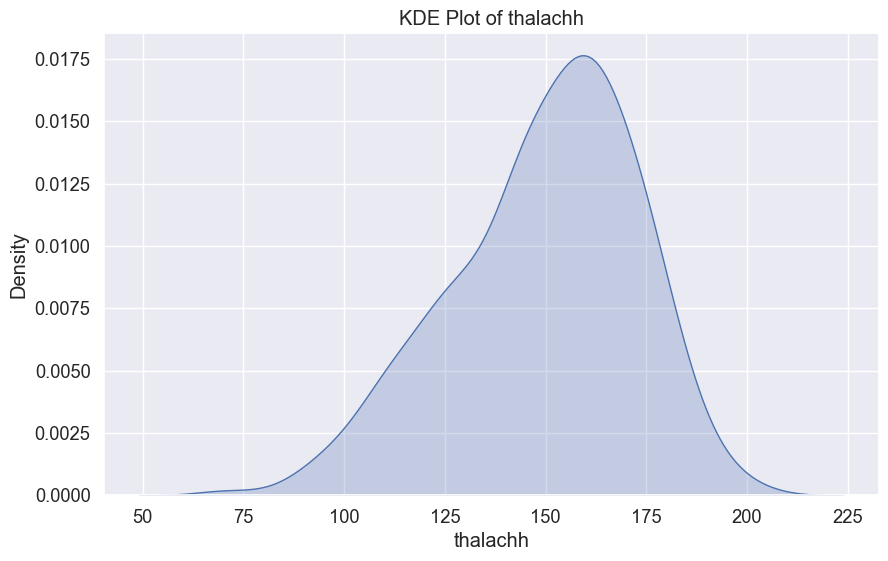

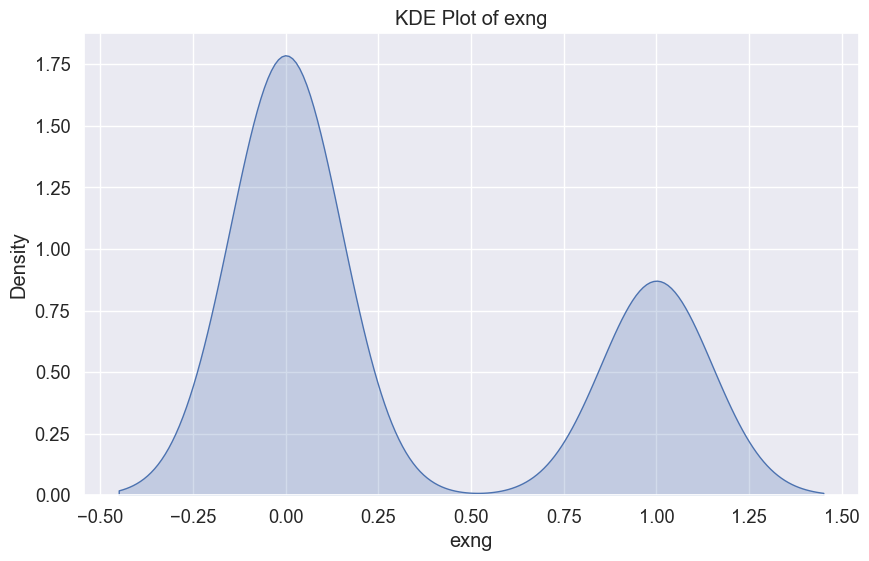

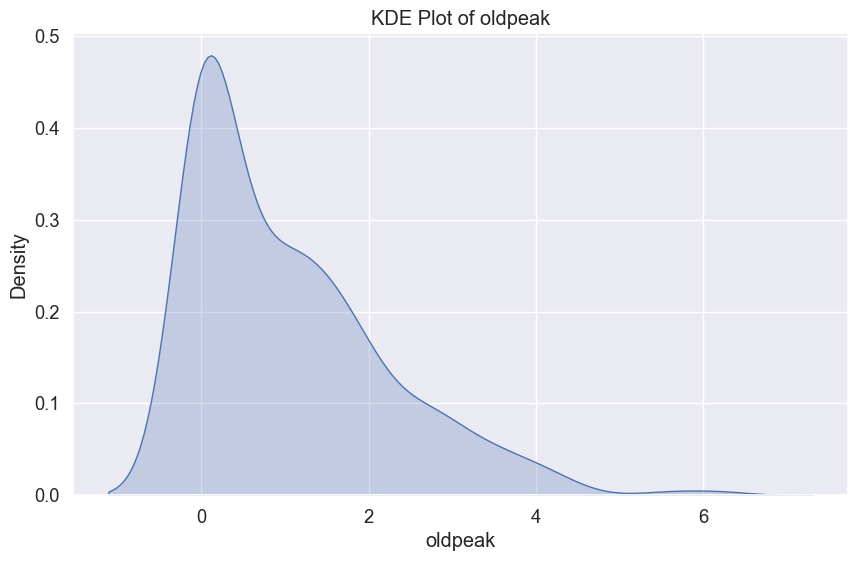

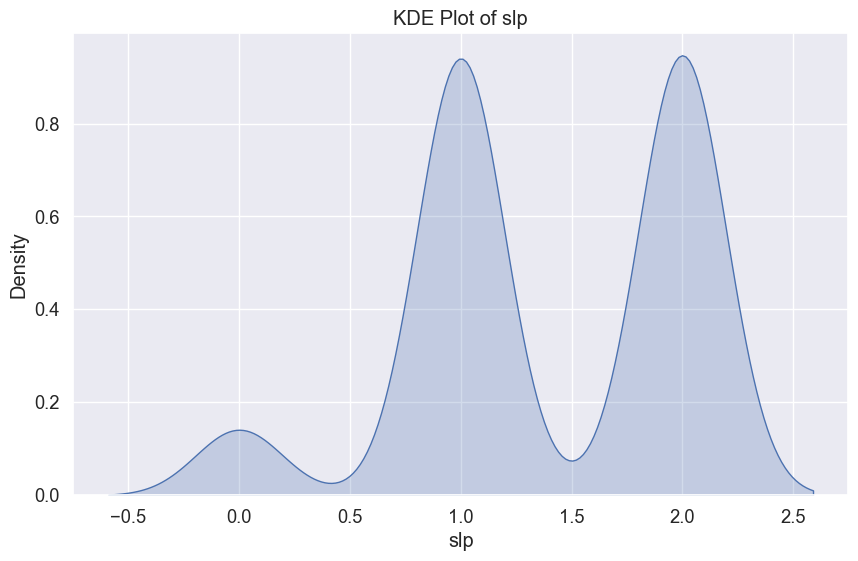

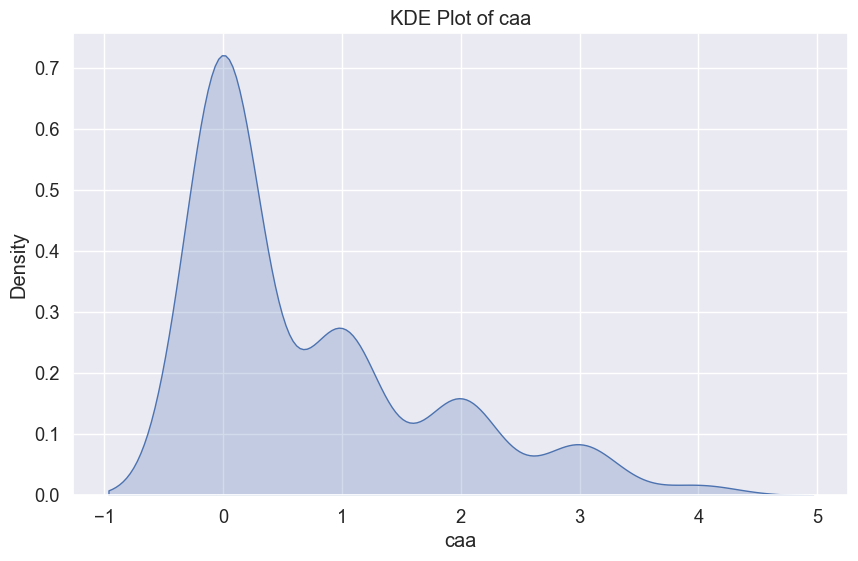

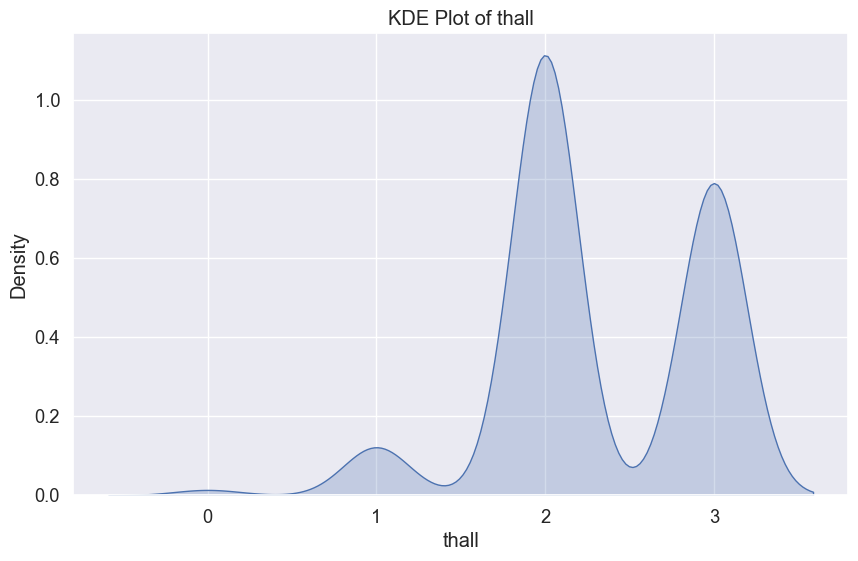

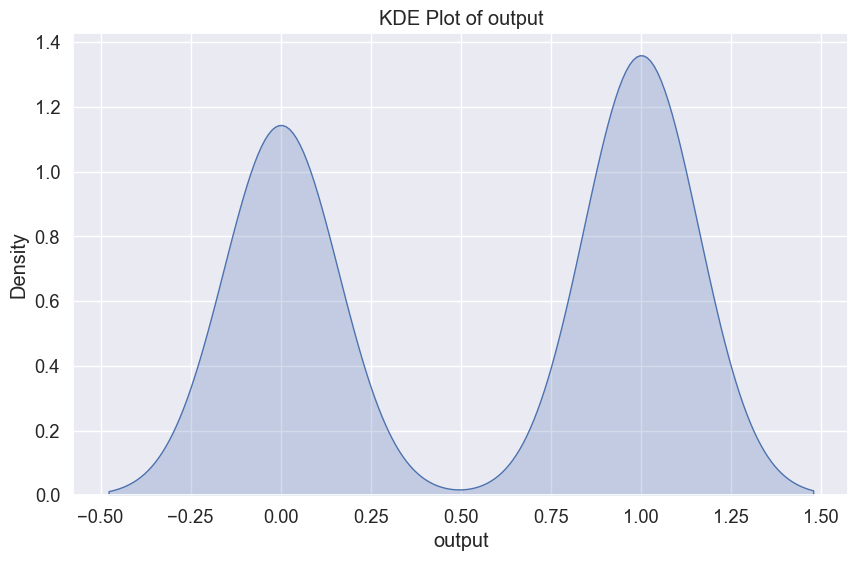

In [11]:
for num in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=num, fill=True,)
    plt.title(f'KDE Plot of {num}')
    plt.xlabel(num)
    plt.ylabel('Density')
    plt.show()

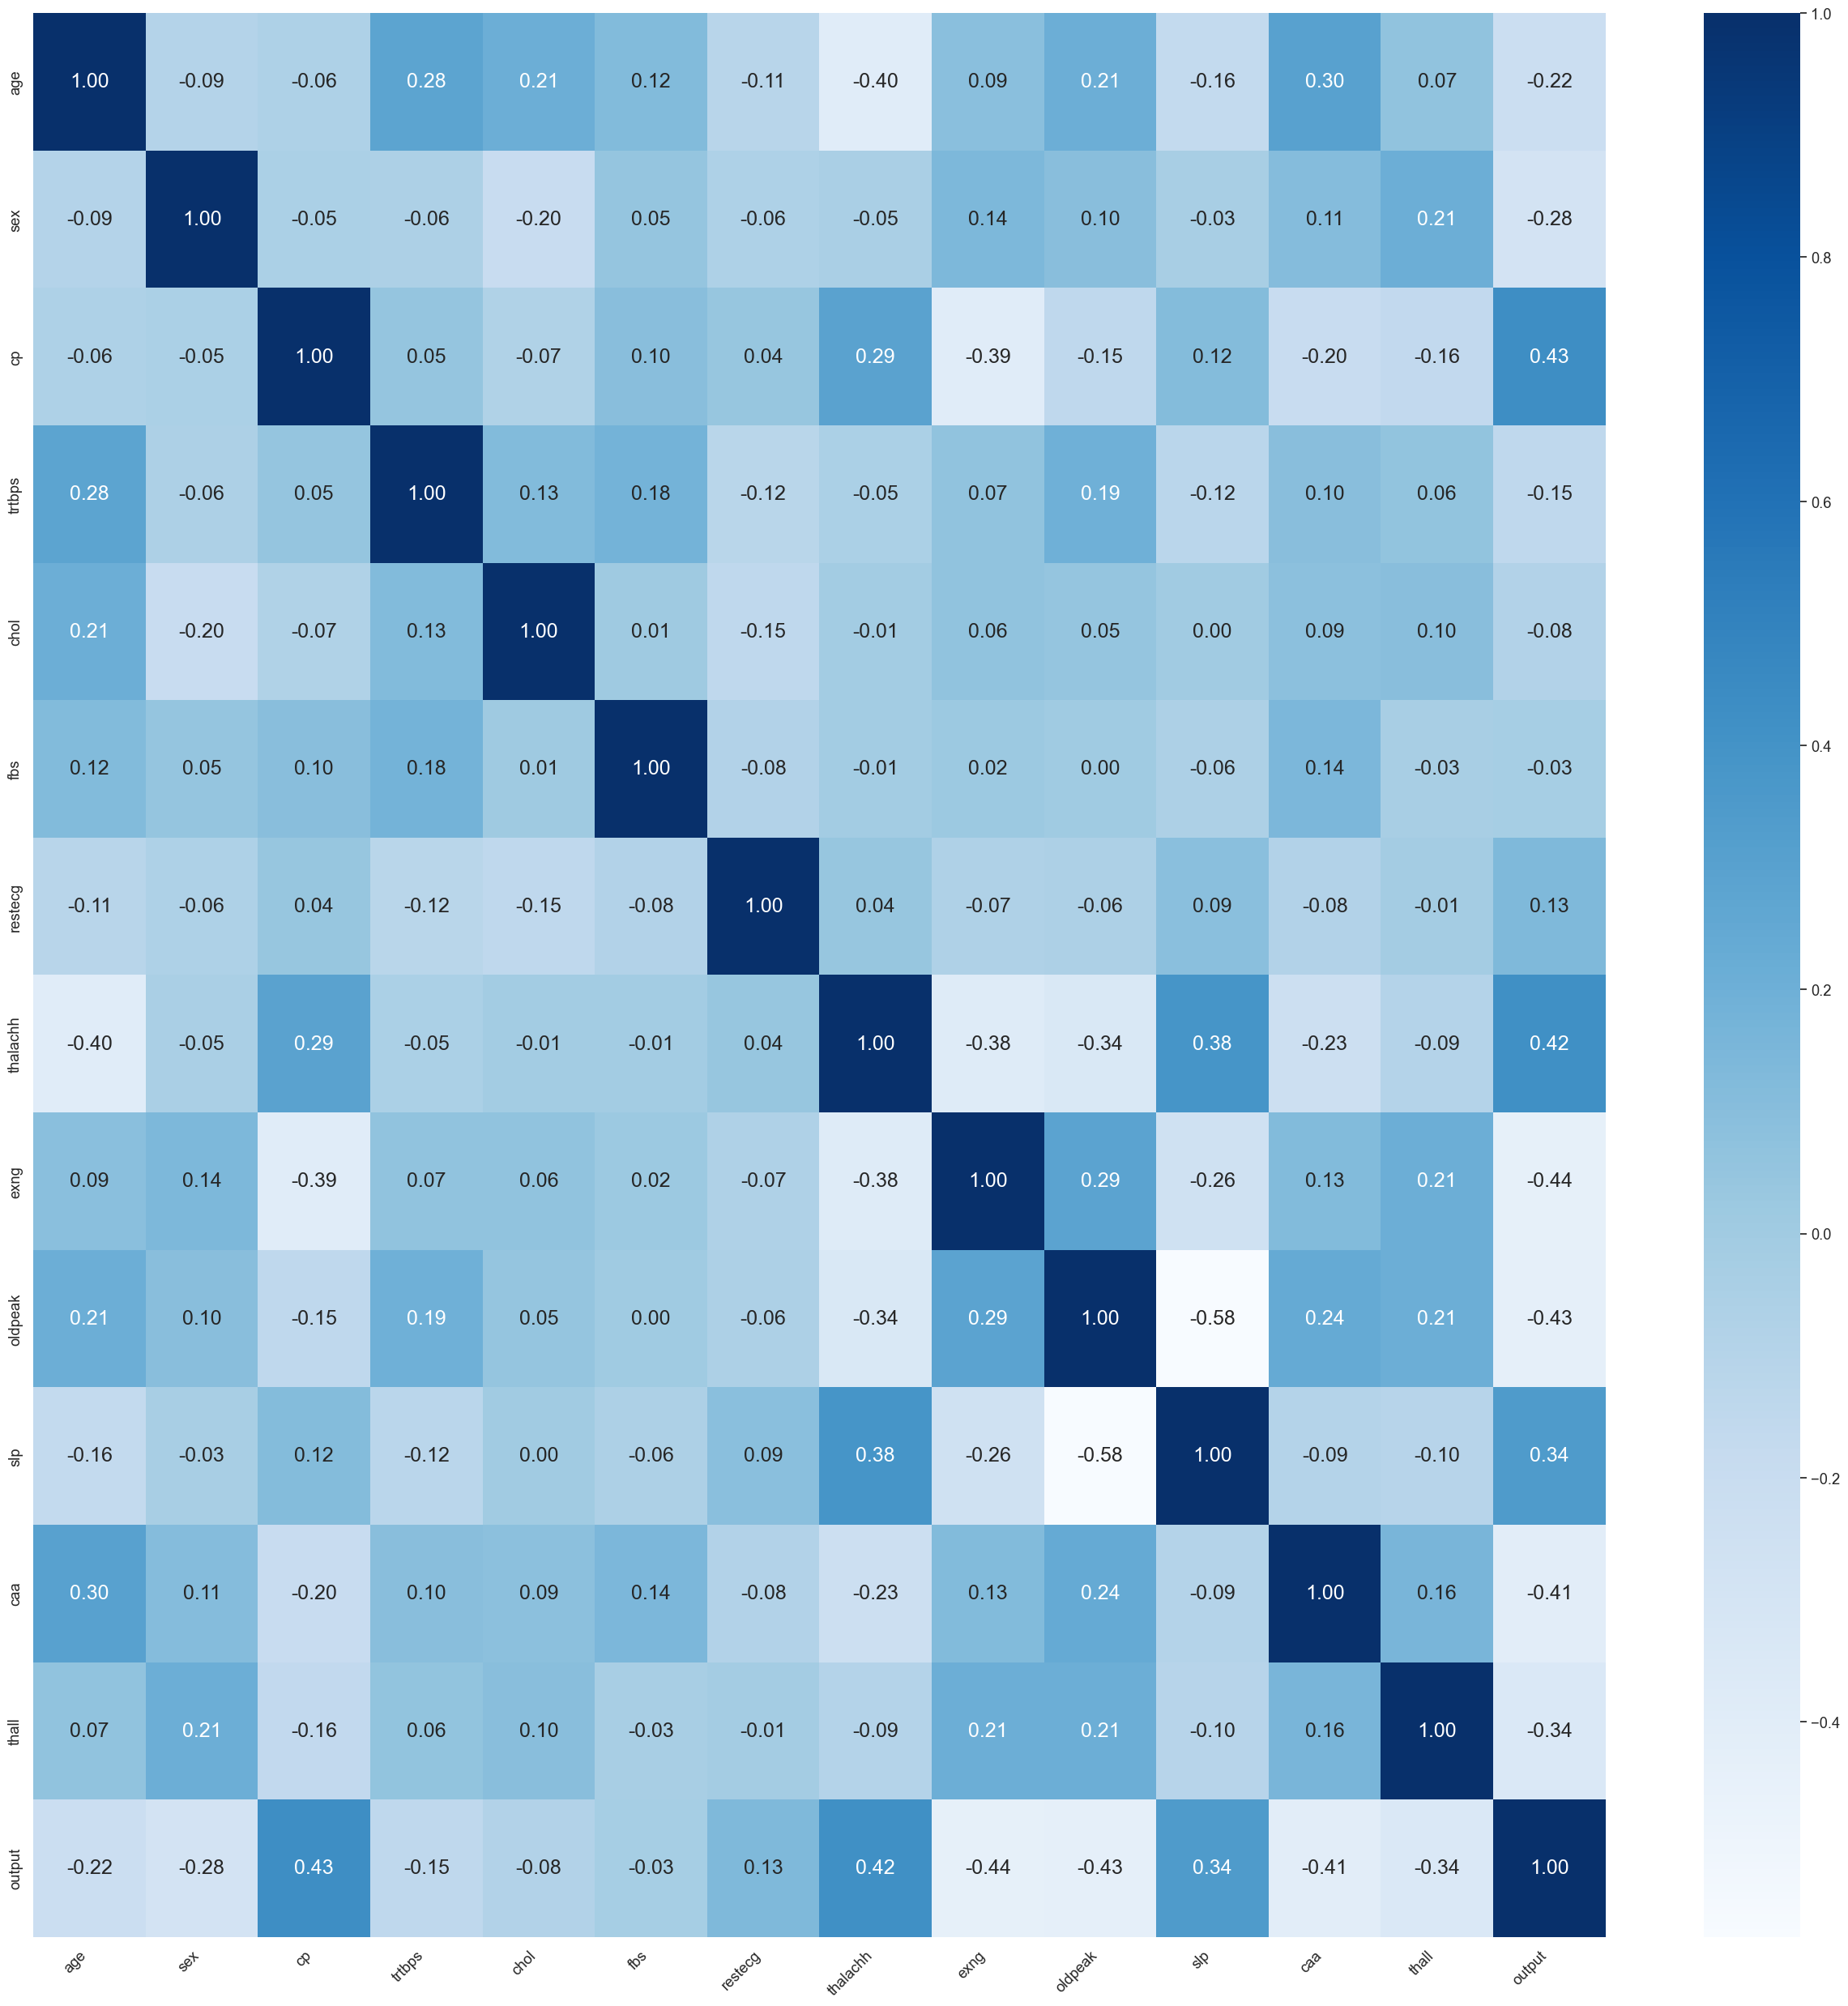

In [12]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(numeric_only=True), 
             annot=True, 
             fmt='.2f',
             cmap='Blues', 
             annot_kws={"size": 18},
             cbar=True)
plt.xticks(rotation=45, ha='right')
plt.yticks()  
plt.tight_layout() 
plt.show()

## ML 

In [14]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
x = df.drop("output",axis=1)
y = df["output"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=38)

In [16]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=38),
    'Random Forest': RandomForestClassifier(random_state=38),
    'Gradient Boosting': GradientBoostingClassifier(random_state=38),
    'Logistic Regression': LogisticRegression(max_iter=1000),  
    'XGBoost': XGBClassifier(eval_metric='mlogloss')  
}

param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5],
        'min_samples_split': [20],
        'min_samples_leaf': [5]
    },
    'Random Forest': {
        'n_estimators': [40,70],
        'max_depth': [5, 8],
        'min_samples_split': [15],
        'max_features': ['sqrt']
    },
    'Gradient Boosting': {
        'n_estimators': [30, 40],
        'learning_rate': [0.01, 0.03],
        'subsample': [0.8]
    },
    'Logistic Regression': {
        'C': [0.5912, 0.6, 0.61],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },

    'XGBoost': {  
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6],
        'colsample_bytree': [0.8, 1.0]
    }
}

scalers = {
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler(),
    'Standard Scaler': StandardScaler()
}

In [17]:
best_models = {}
best_params = {}
best_scores = {}
grid_search_results = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}: ")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=2, scoring='accuracy', verbose=2)
    grid_search.fit(x_train, y_train)

    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}\n")
    grid_search_results[model_name] = grid_search.cv_results_

Running GridSearchCV for Decision Tree: 
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best cross-validation accuracy for Decision Tree: 0.7760330578512398

Running GridSearchCV for Random Forest: 
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=40; total time=   0.0s
[CV] E

In [18]:
best_params = {
    'Decision Tree': {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 20},
    'Random Forest': {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 70},
    'Gradient Boosting': {'learning_rate': 0.03, 'n_estimators': 30, 'subsample': 0.8},
    'Logistic Regression': {'C': 0.5912, 'penalty': 'l1', 'solver': 'liblinear'},
    'XGBoost': {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100},
}

results_df = {
    'Model': [],
    'Scaler': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=38, **best_params['Decision Tree']),
    'Random Forest': RandomForestClassifier(random_state=38, **best_params['Random Forest']),
    'Gradient Boosting': GradientBoostingClassifier(random_state=38, **best_params['Gradient Boosting']),
    'Logistic Regression': LogisticRegression(max_iter=1000, **best_params['Logistic Regression']),
    'XGBoost': XGBClassifier(eval_metric='mlogloss',**best_params['XGBoost'])

}

scalers = {
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler(),
    'Standard Scaler': StandardScaler()
}

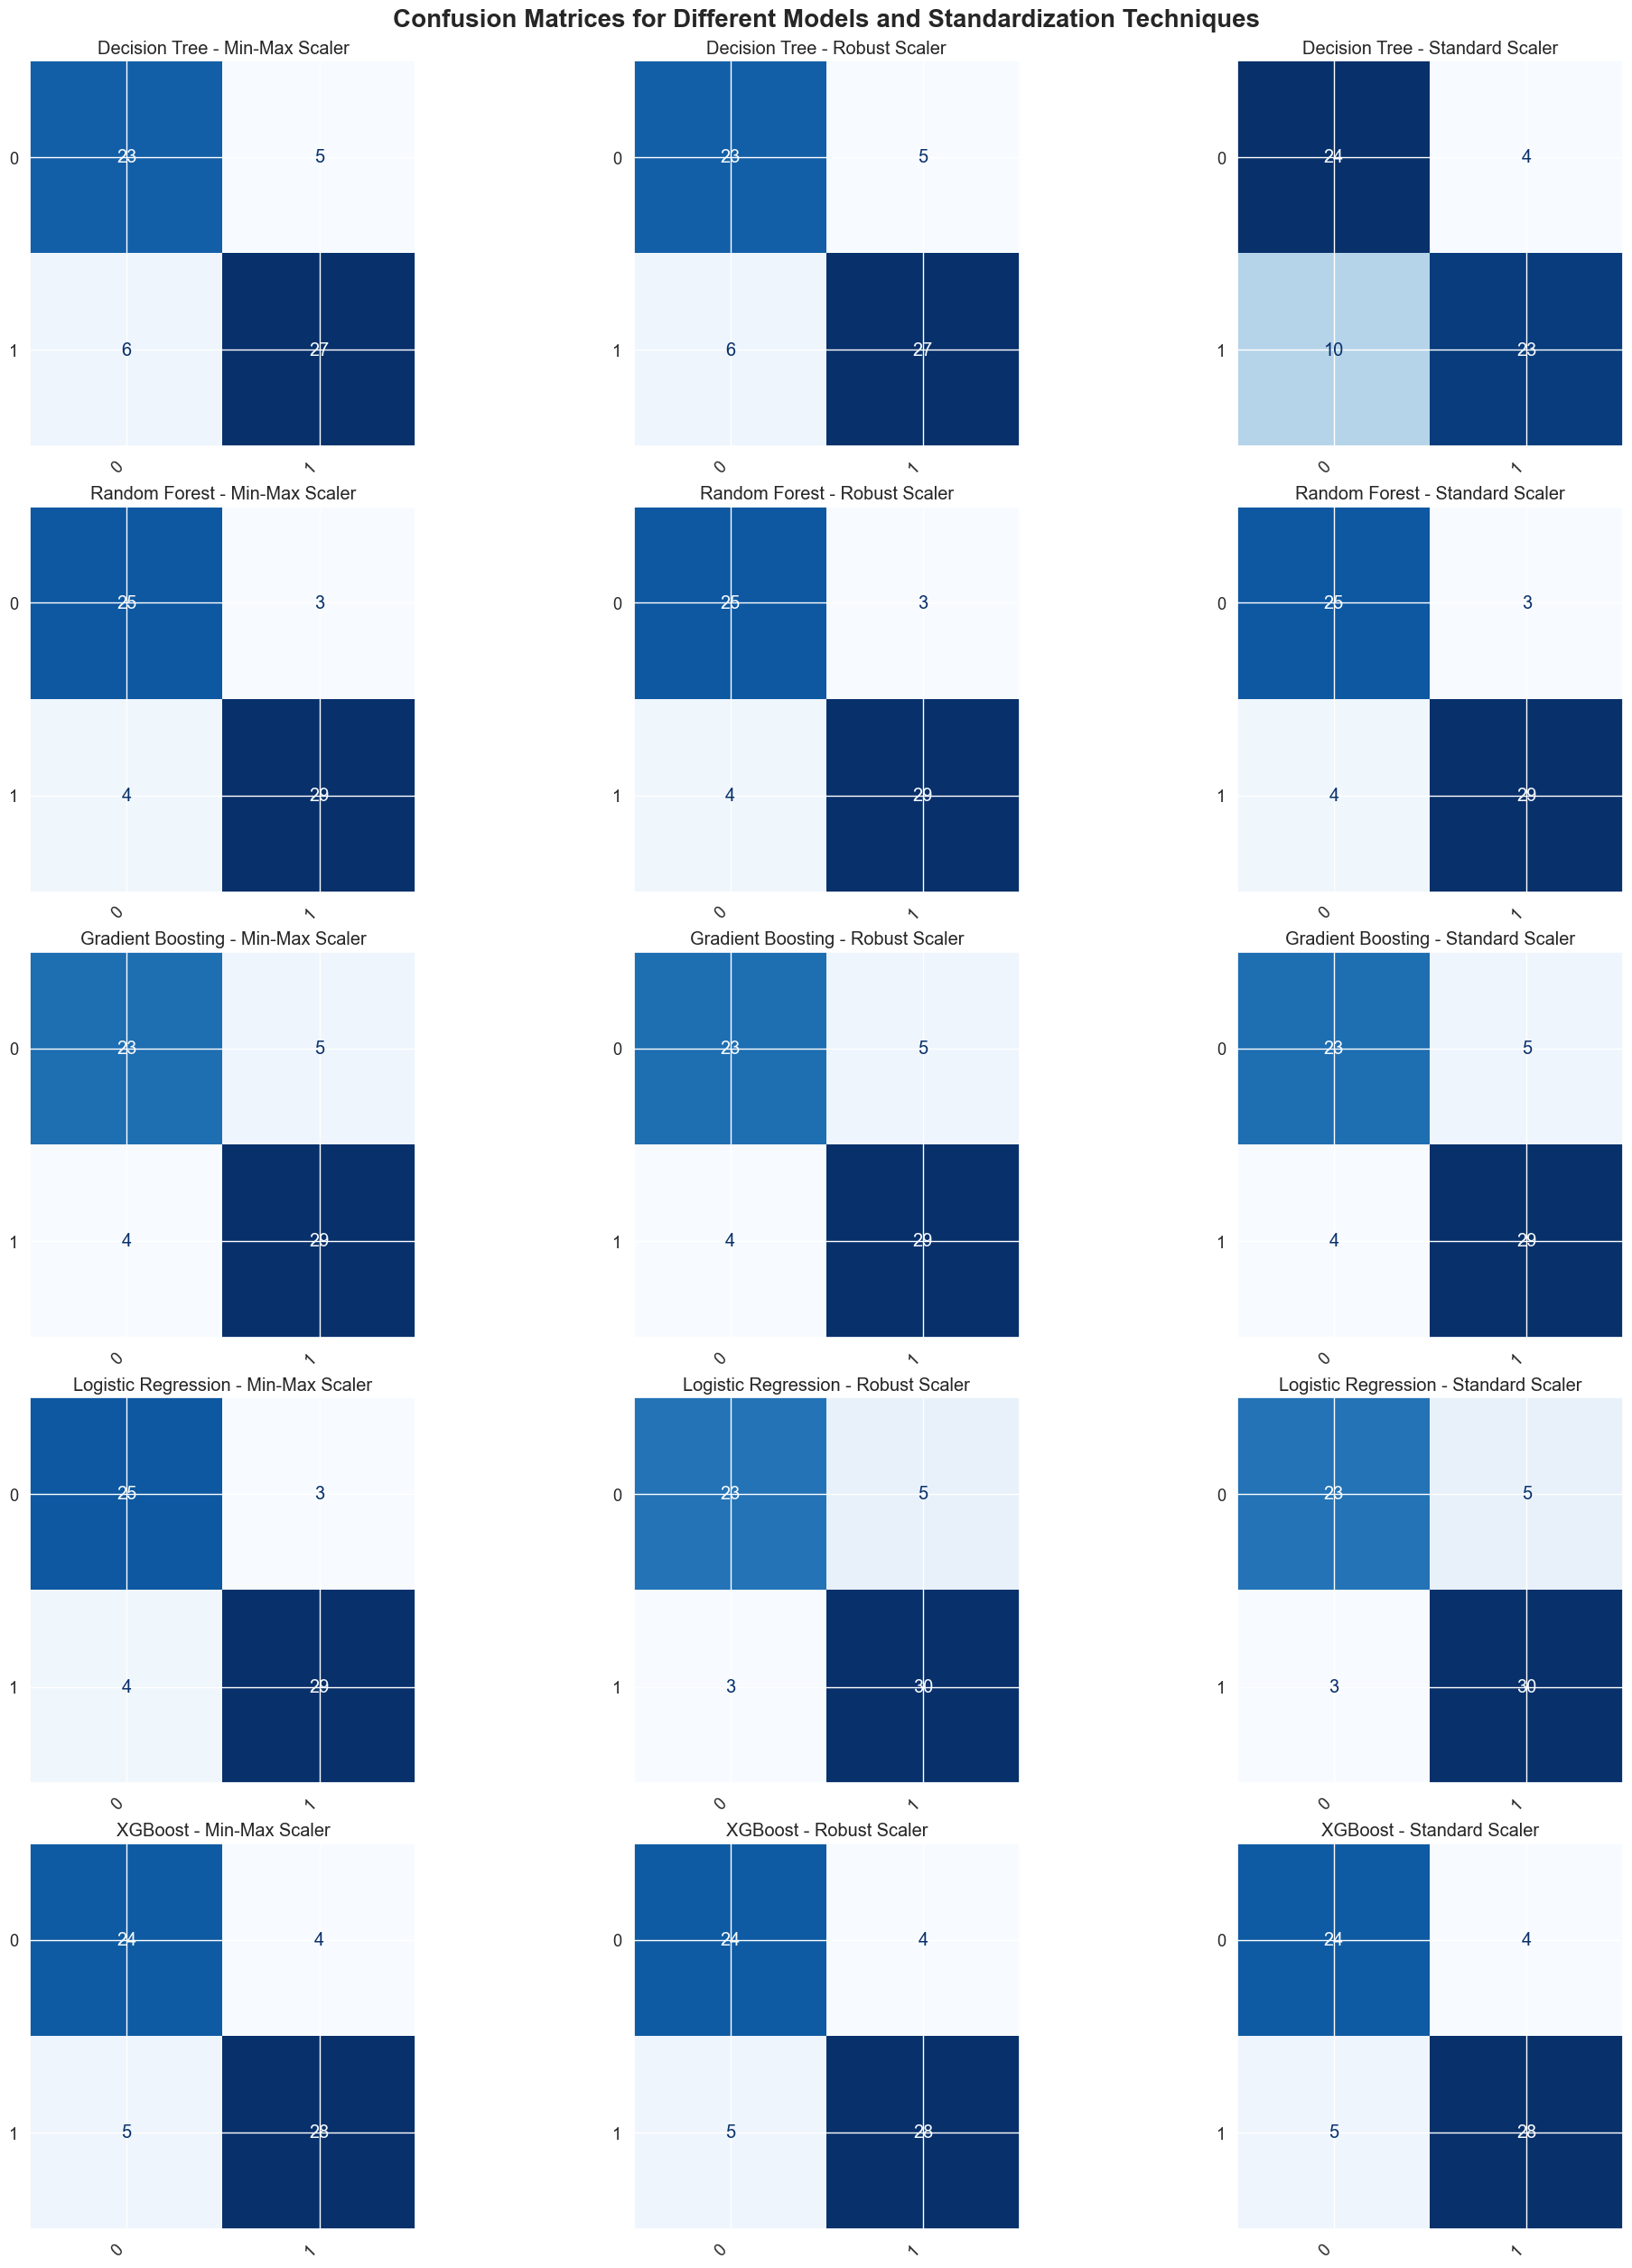

In [19]:
def evaluate_models(models, scalers, x_train, y_train, x_test, y_test):
    results = {model_name: {scaler_name: {'y_true': [], 'y_pred': []} for scaler_name in scalers.keys()} for model_name in models.keys()}
    results_df = {"Model": [], "Scaler": [], "Train Accuracy": [], "Test Accuracy": []}

    for model_name, model in models.items():
        for scaler_name, scaler in scalers.items():
            x_train_scaled = scaler.fit_transform(x_train)
            x_test_scaled = scaler.transform(x_test)

            model.fit(x_train_scaled, y_train)
            y_test_pred = model.predict(x_test_scaled)

            train_acc = accuracy_score(y_train, model.predict(x_train_scaled))
            test_acc = accuracy_score(y_test, y_test_pred)

            results_df["Model"].append(model_name)
            results_df["Scaler"].append(scaler_name)
            results_df["Train Accuracy"].append(train_acc)
            results_df["Test Accuracy"].append(test_acc)
            results[model_name][scaler_name]['y_true'] = y_test
            results[model_name][scaler_name]['y_pred'] = y_test_pred

    return results, results_df

def plot_confusion_matrices(results, models, scalers):
    num_models = len(models)
    num_scalers = len(scalers)

    fig, axes = plt.subplots(num_models, num_scalers, figsize=(20, num_models * 5), constrained_layout=True)

    for i, (model_name, _) in enumerate(models.items()):
        for j, (scaler_name, _) in enumerate(scalers.items()):
            ax = axes[i, j]
            y_test = results[model_name][scaler_name]['y_true']
            y_pred = results[model_name][scaler_name]['y_pred']

            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)

            ax.set_title(f'{model_name} - {scaler_name}')
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.suptitle('Confusion Matrices for Different Models and Standardization Techniques', fontsize=20, weight='bold')
    plt.savefig('plot15.png', dpi=300, bbox_inches='tight')
    plt.show()

results, results_df = evaluate_models(models, scalers, x_train, y_train, x_test, y_test)
plot_confusion_matrices(results, models, scalers)


In [20]:
pd.DataFrame(results_df)

,Model,Scaler,Train Accuracy,Test Accuracy
0,Decision Tree,Min-Max Scaler,0.842324,0.819672
1,Decision Tree,Robust Scaler,0.842324,0.819672
2,Decision Tree,Standard Scaler,0.842324,0.770492
3,Random Forest,Min-Max Scaler,0.917012,0.885246
4,Random Forest,Robust Scaler,0.917012,0.885246
5,Random Forest,Standard Scaler,0.917012,0.885246
6,Gradient Boosting,Min-Max Scaler,0.887967,0.852459
7,Gradient Boosting,Robust Scaler,0.887967,0.852459
8,Gradient Boosting,Standard Scaler,0.892116,0.852459
9,Logistic Regression,Min-Max Scaler,0.834025,0.885246


In [21]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = RandomForestClassifier(random_state=38, max_depth= 8, max_features= 'sqrt', min_samples_split= 15, n_estimators= 70)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
report = classification_report(y_test, y_pred)

print(report)

Accuracy: 0.8852
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

